## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
# Start solution here
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(data.head())
# print(data)
# print(data.tail())
print(data.info())

      id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   fl

In [3]:
data.replace('Female',0,inplace=True)
data.replace('Male',1,inplace=True)
data.replace('Other',2,inplace=True)

data.replace('Yes',0,inplace=True)
data.replace('No',1,inplace=True)

data.replace('Private',0,inplace=True)
data.replace('Self-employed',1,inplace=True)
data.replace('Govt_job',2,inplace=True)
data.replace('children',3,inplace=True)
data.replace('Never_worked',4,inplace=True)


data.replace('Urban',0,inplace=True)
data.replace('Rural',1,inplace=True)

data.replace('formerly smoked',0,inplace=True)
data.replace('never smoked',1,inplace=True)
data.replace('smokes',2,inplace=True)
data.replace('Unknown',3,inplace=True)



print(data)
# data.replace('Yes':0,'No':1}})
# data.replace('No',1}})
# data.replace({'work_type':{'Private':0,'Self-employed':1,'Govt_job':2}})
# data.replace({'Residence_type':{'Urban':0,'Rural':1}})
# data.replace({'smoking_status':{'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3}})



print(data.head())


         id  gender   age  ...   bmi  smoking_status  stroke
0      9046       1  67.0  ...  36.6               0       1
1     51676       0  61.0  ...   NaN               1       1
2     31112       1  80.0  ...  32.5               1       1
3     60182       0  49.0  ...  34.4               2       1
4      1665       0  79.0  ...  24.0               1       1
...     ...     ...   ...  ...   ...             ...     ...
5105  18234       0  80.0  ...   NaN               1       0
5106  44873       0  81.0  ...  40.0               1       0
5107  19723       0  35.0  ...  30.6               1       0
5108  37544       1  51.0  ...  25.6               0       0
5109  44679       0  44.0  ...  26.2               3       0

[5110 rows x 12 columns]
      id  gender   age  ...   bmi  smoking_status  stroke
0   9046       1  67.0  ...  36.6               0       1
1  51676       0  61.0  ...   NaN               1       1
2  31112       1  80.0  ...  32.5               1       1
3  60182  

In [4]:
df = pd.DataFrame(data,
                  columns=['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke'])
            
print(df)
# print(df.tail())
dropLabels = ['id']
dfCleaning = df.drop(axis=1, columns=dropLabels)
dfClean = dfCleaning.dropna()
print(dfClean.info())
print(dfClean)



         id  gender   age  ...   bmi  smoking_status  stroke
0      9046       1  67.0  ...  36.6               0       1
1     51676       0  61.0  ...   NaN               1       1
2     31112       1  80.0  ...  32.5               1       1
3     60182       0  49.0  ...  34.4               2       1
4      1665       0  79.0  ...  24.0               1       1
...     ...     ...   ...  ...   ...             ...     ...
5105  18234       0  80.0  ...   NaN               1       0
5106  44873       0  81.0  ...  40.0               1       0
5107  19723       0  35.0  ...  30.6               1       0
5108  37544       1  51.0  ...  25.6               0       0
5109  44679       0  44.0  ...  26.2               3       0

[5110 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null  

In [5]:
from sklearn.model_selection import train_test_split

# separate target variable from features
X = dfClean.iloc[:, 0:-1]
y = dfClean.iloc[:, -1]

print(dfClean.shape)
print(X.shape)
print(y.shape)

(4909, 11)
(4909, 10)
(4909,)


In [6]:
# partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=21)

In [7]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.9572301425661914


In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.9531568228105907


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
y_pred = dt.predict(X_test)

In [11]:
print(dt.feature_importances_)
importance = pd.DataFrame(zip(X_train.columns,dt.feature_importances_))
sort = importance.sort_values(1,ascending=False)
print(sort)
#as predicted, Big Three factors lead the way for importance

[0.03742554 0.29978772 0.01428467 0.01864785 0.00325288 0.01902339
 0.01708118 0.35452404 0.20029613 0.03567659]
                   0         1
7  avg_glucose_level  0.354524
1                age  0.299788
8                bmi  0.200296
0             gender  0.037426
9     smoking_status  0.035677
5          work_type  0.019023
3      heart_disease  0.018648
6     Residence_type  0.017081
2       hypertension  0.014285
4       ever_married  0.003253


[[1357   53]
 [  55    8]]
Accuracy = 0.9266802443991853


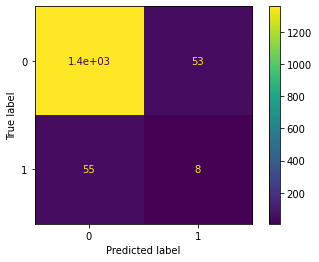

In [12]:
from sklearn import metrics

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)
acc_dt = metrics.accuracy_score(y_test, y_pred)
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

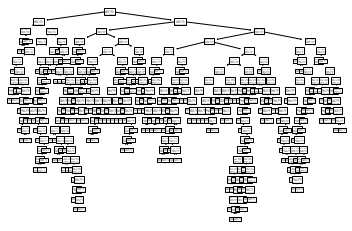

In [13]:
from sklearn import tree

plt.figure(2)
fn = X.columns
cn = y.unique()
StrokeTree = tree.plot_tree(dt)
plt.savefig('stroketree.png')
plt.show()

In [14]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [15]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

In [16]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [17]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(dt, X, y,
                target_name="target",
                feature_names=fn,
                class_names=['0','1'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [18]:
viz
viz.save("strokeTree.svg")

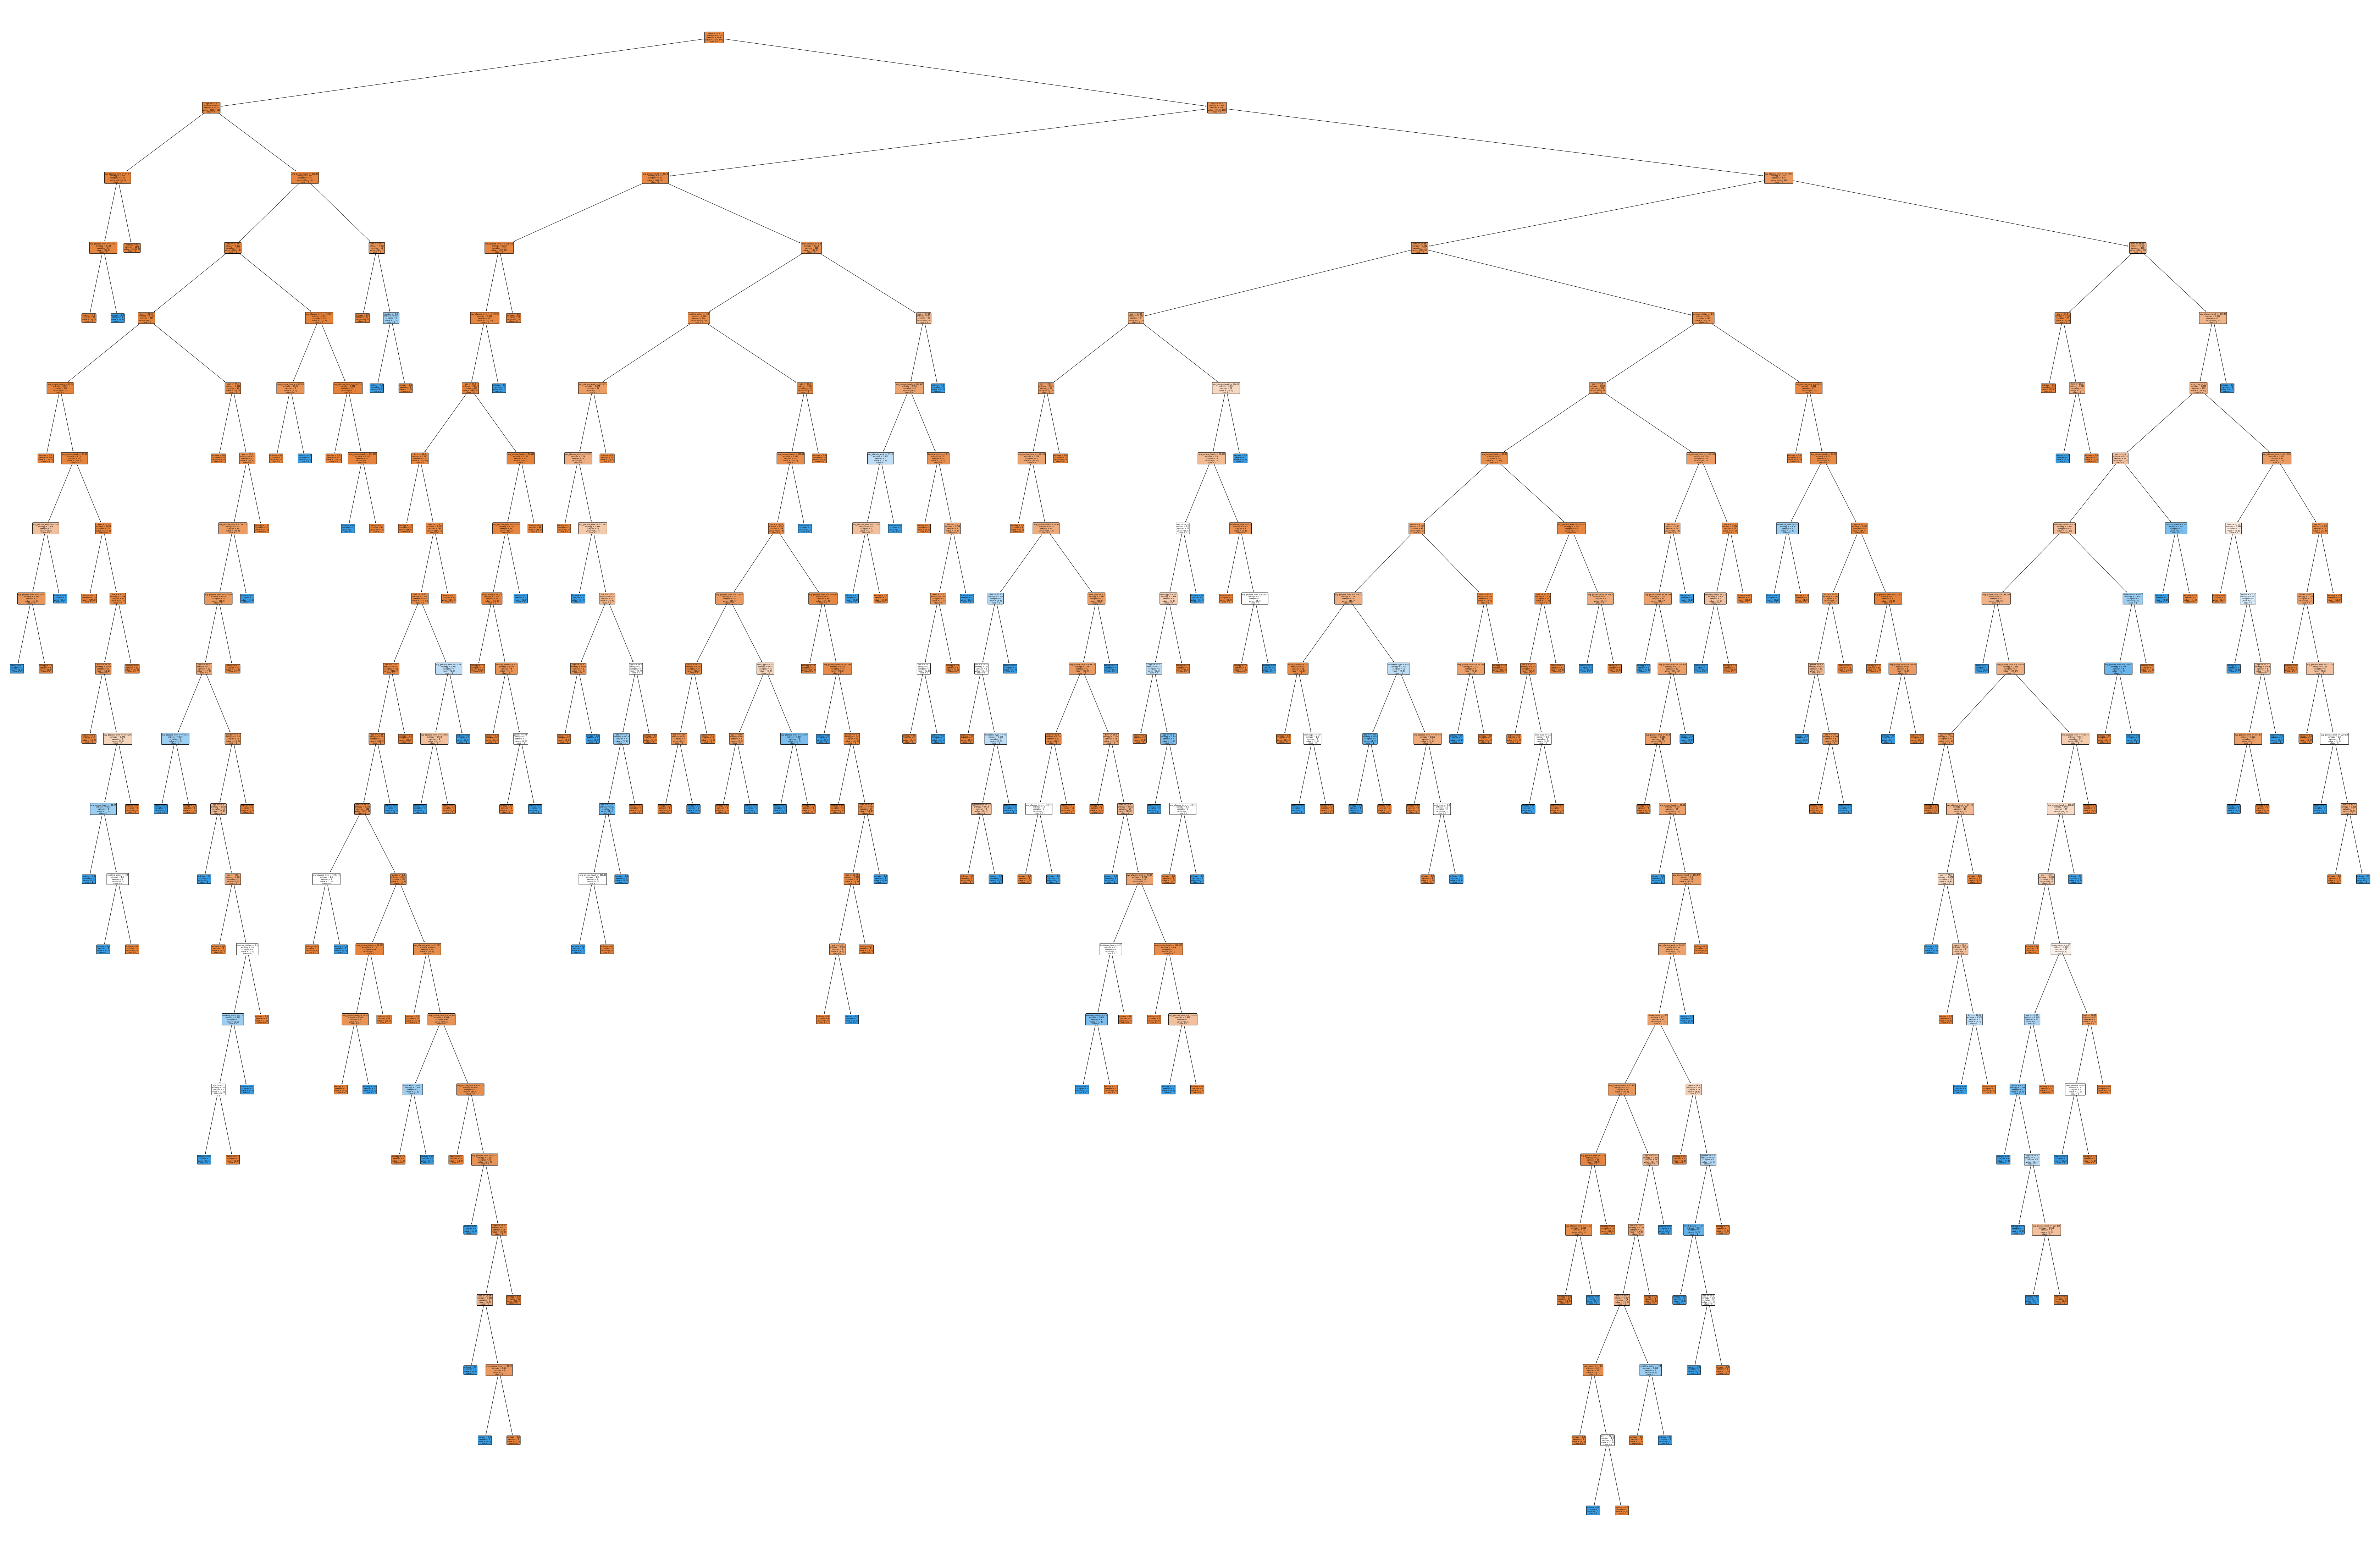

In [19]:
from sklearn import tree

plt.figure(1,figsize=[120,80])
fn = X.columns
cn = ['0','1']
strokeTree = tree.plot_tree(dt,filled=True,rounded=True,feature_names = fn,class_names=cn)
# plt.savefig('strokeTree.png')
# plt.figure(figsize=[100,100])
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, model_rf.predict(X_test))
print('Testing Accuracy:\t\t', acc_rf)

feature_importances = model_rf.feature_importances_
features = X_train.columns
dff = pd.DataFrame({'features': features, 'importance': feature_importances})
sort = dff.sort_values('importance',ascending=False)
print(sort)

Testing Accuracy:		 0.955193482688391
            features  importance
7  avg_glucose_level    0.318759
8                bmi    0.243408
1                age    0.205243
9     smoking_status    0.062846
5          work_type    0.040046
6     Residence_type    0.031543
0             gender    0.030918
2       hypertension    0.028006
3      heart_disease    0.020764
4       ever_married    0.018467


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier (max_depth = 4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, y_train)
acc_boost = (accuracy_score(y_test, ada_boost.predict(X_test)))
print('AdaBoost Acc:\t', acc_boost)

feature_importances = ada_boost.feature_importances_
features = X_train.columns
df_adaBoost = pd.DataFrame({'features': features, 'importance': feature_importances})
sort = df_adaBoost.sort_values('importance',ascending=False)

print(sort) #top 3 are still the same! great work
#based off of the success of adaboost (a simpler boosting approach, i will now use XGB so I can use more 
#techniques like related to regularization)

AdaBoost Acc:	 0.9524779361846571
            features  importance
7  avg_glucose_level    0.337762
8                bmi    0.240181
1                age    0.232756
4       ever_married    0.045639
9     smoking_status    0.044230
2       hypertension    0.036715
0             gender    0.022705
5          work_type    0.017710
6     Residence_type    0.013286
3      heart_disease    0.009014


In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

pred = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: " , (rmse))

from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)

pred_train = linear_reg_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train,pred_train))
print("Train RMSE:" , (train_rmse))

pred_test = linear_reg_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test,pred_test))
print("Test RMSE: " , (test_rmse))
#with solid numbers, let's push on to cross validation

[03:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  0.19785815218217853
Train RMSE: 0.19371243867895507
Test RMSE:  0.19499399740066034


In [24]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [25]:
#3 layer cross validation:
# data_dmatrix = xgb.DMatrix(data=X,label=y)
 #first creating matrix that's needed for later steps
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 6}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print('final round of boosting number')
print((cv_results["test-rmse-mean"]).tail(1))
#thus, we can see that the RMSE decreased with these hyperparamaters, demonstrating the 
#validity of using these parameters! feeling great!
#however, one issue is that all of this feels quite abstract.
#it would be nice to 'see it' like we can with decision trees, creating another fun graph for us to use!

[03:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
final round of boosting number
49    0.193356
Name: test-rmse-mean, dtype: float64


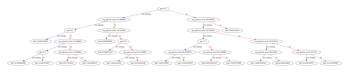

In [26]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=2)
plt.rcParams['figure.figsize'] = [300,300]
plt.savefig('XGBTreeViz.png')

plt.show()

[03:41:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


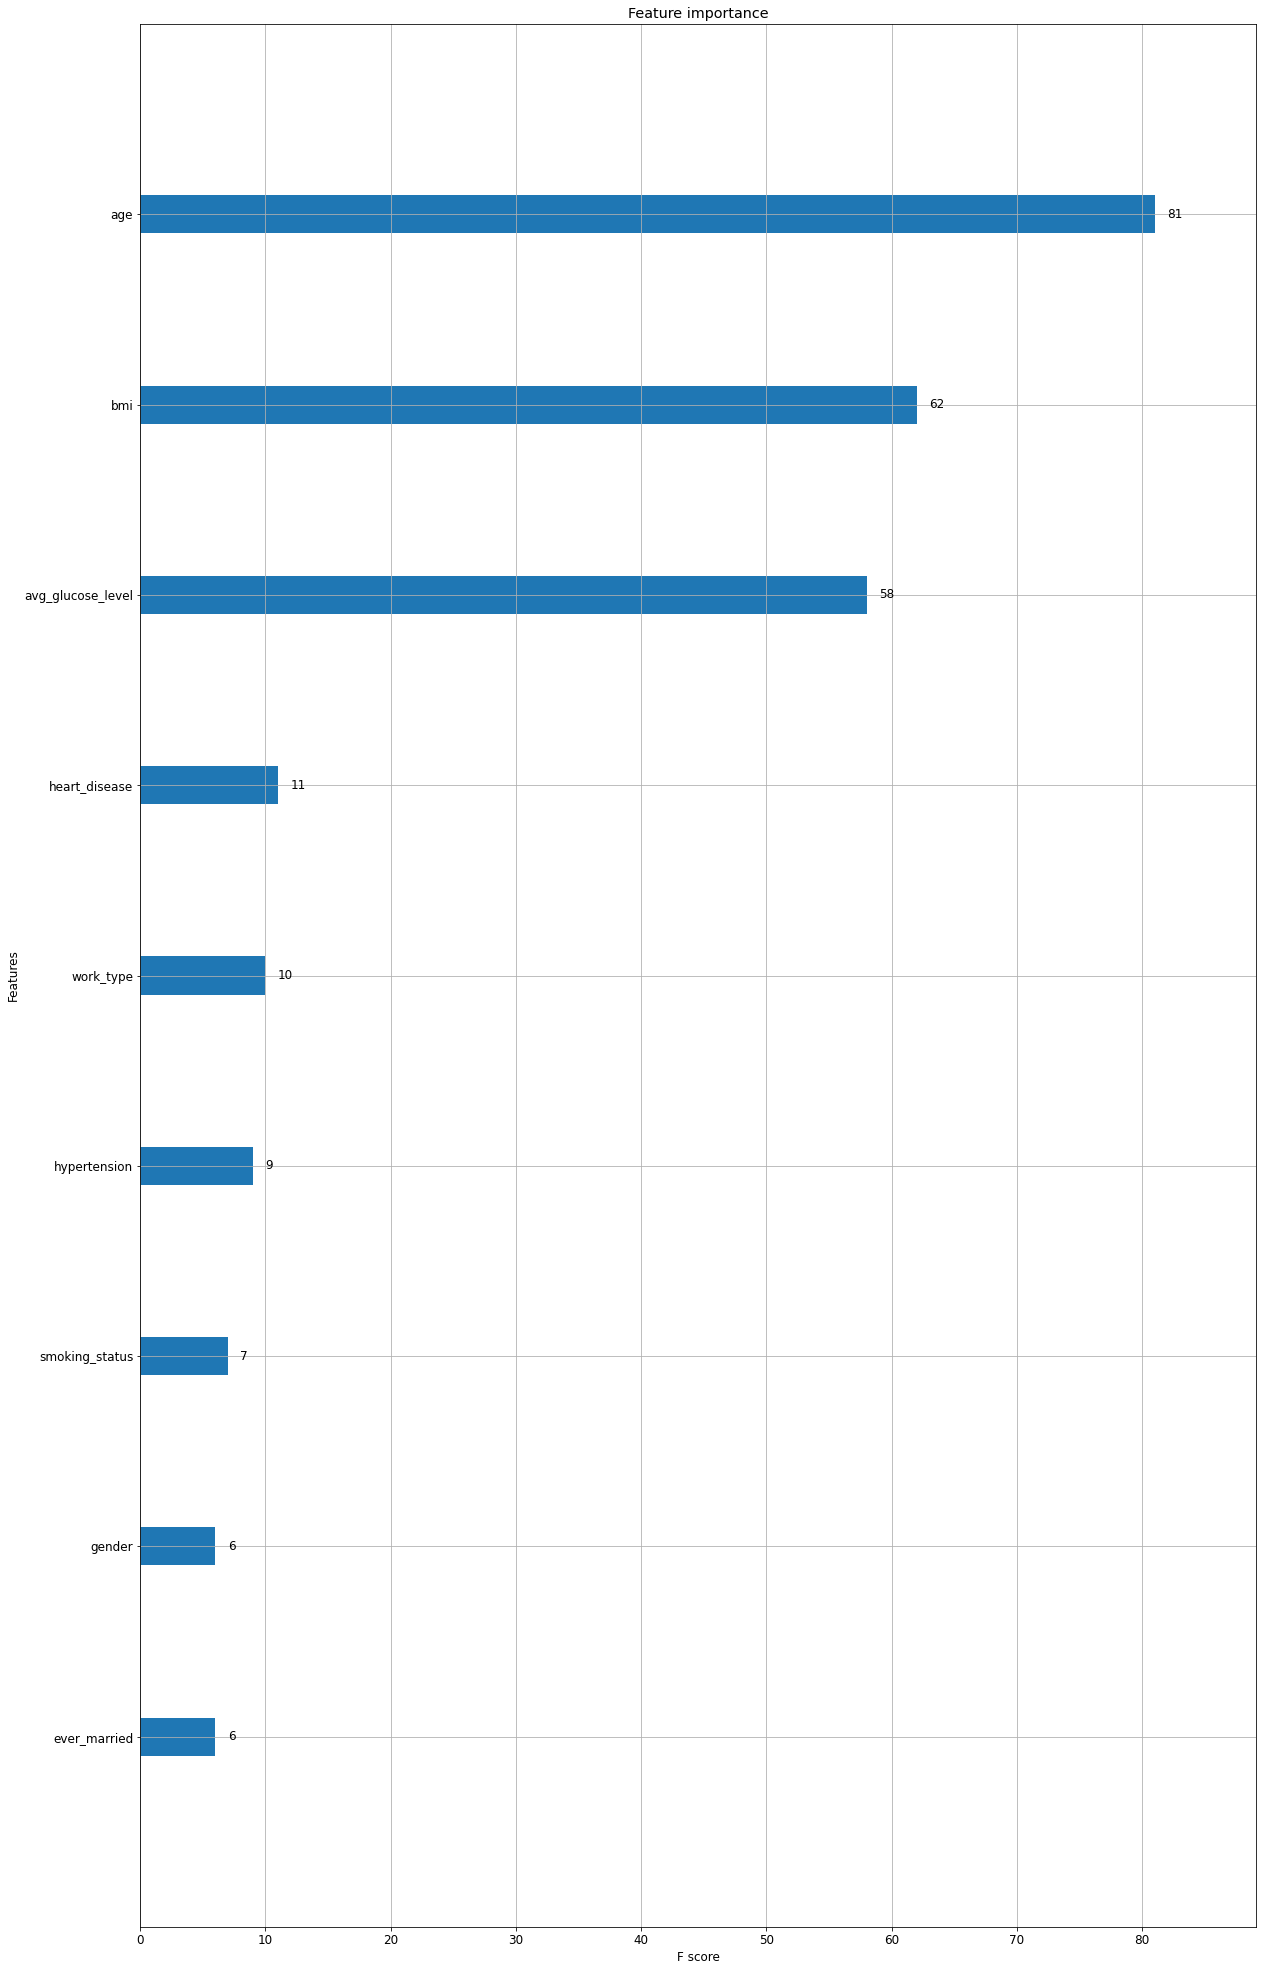

In [41]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=50)
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [25, 30]
plt.rcParams['font.size'] = 12
plt.savefig('XGBfeatureimportanceFINALh.png')
plt.show()

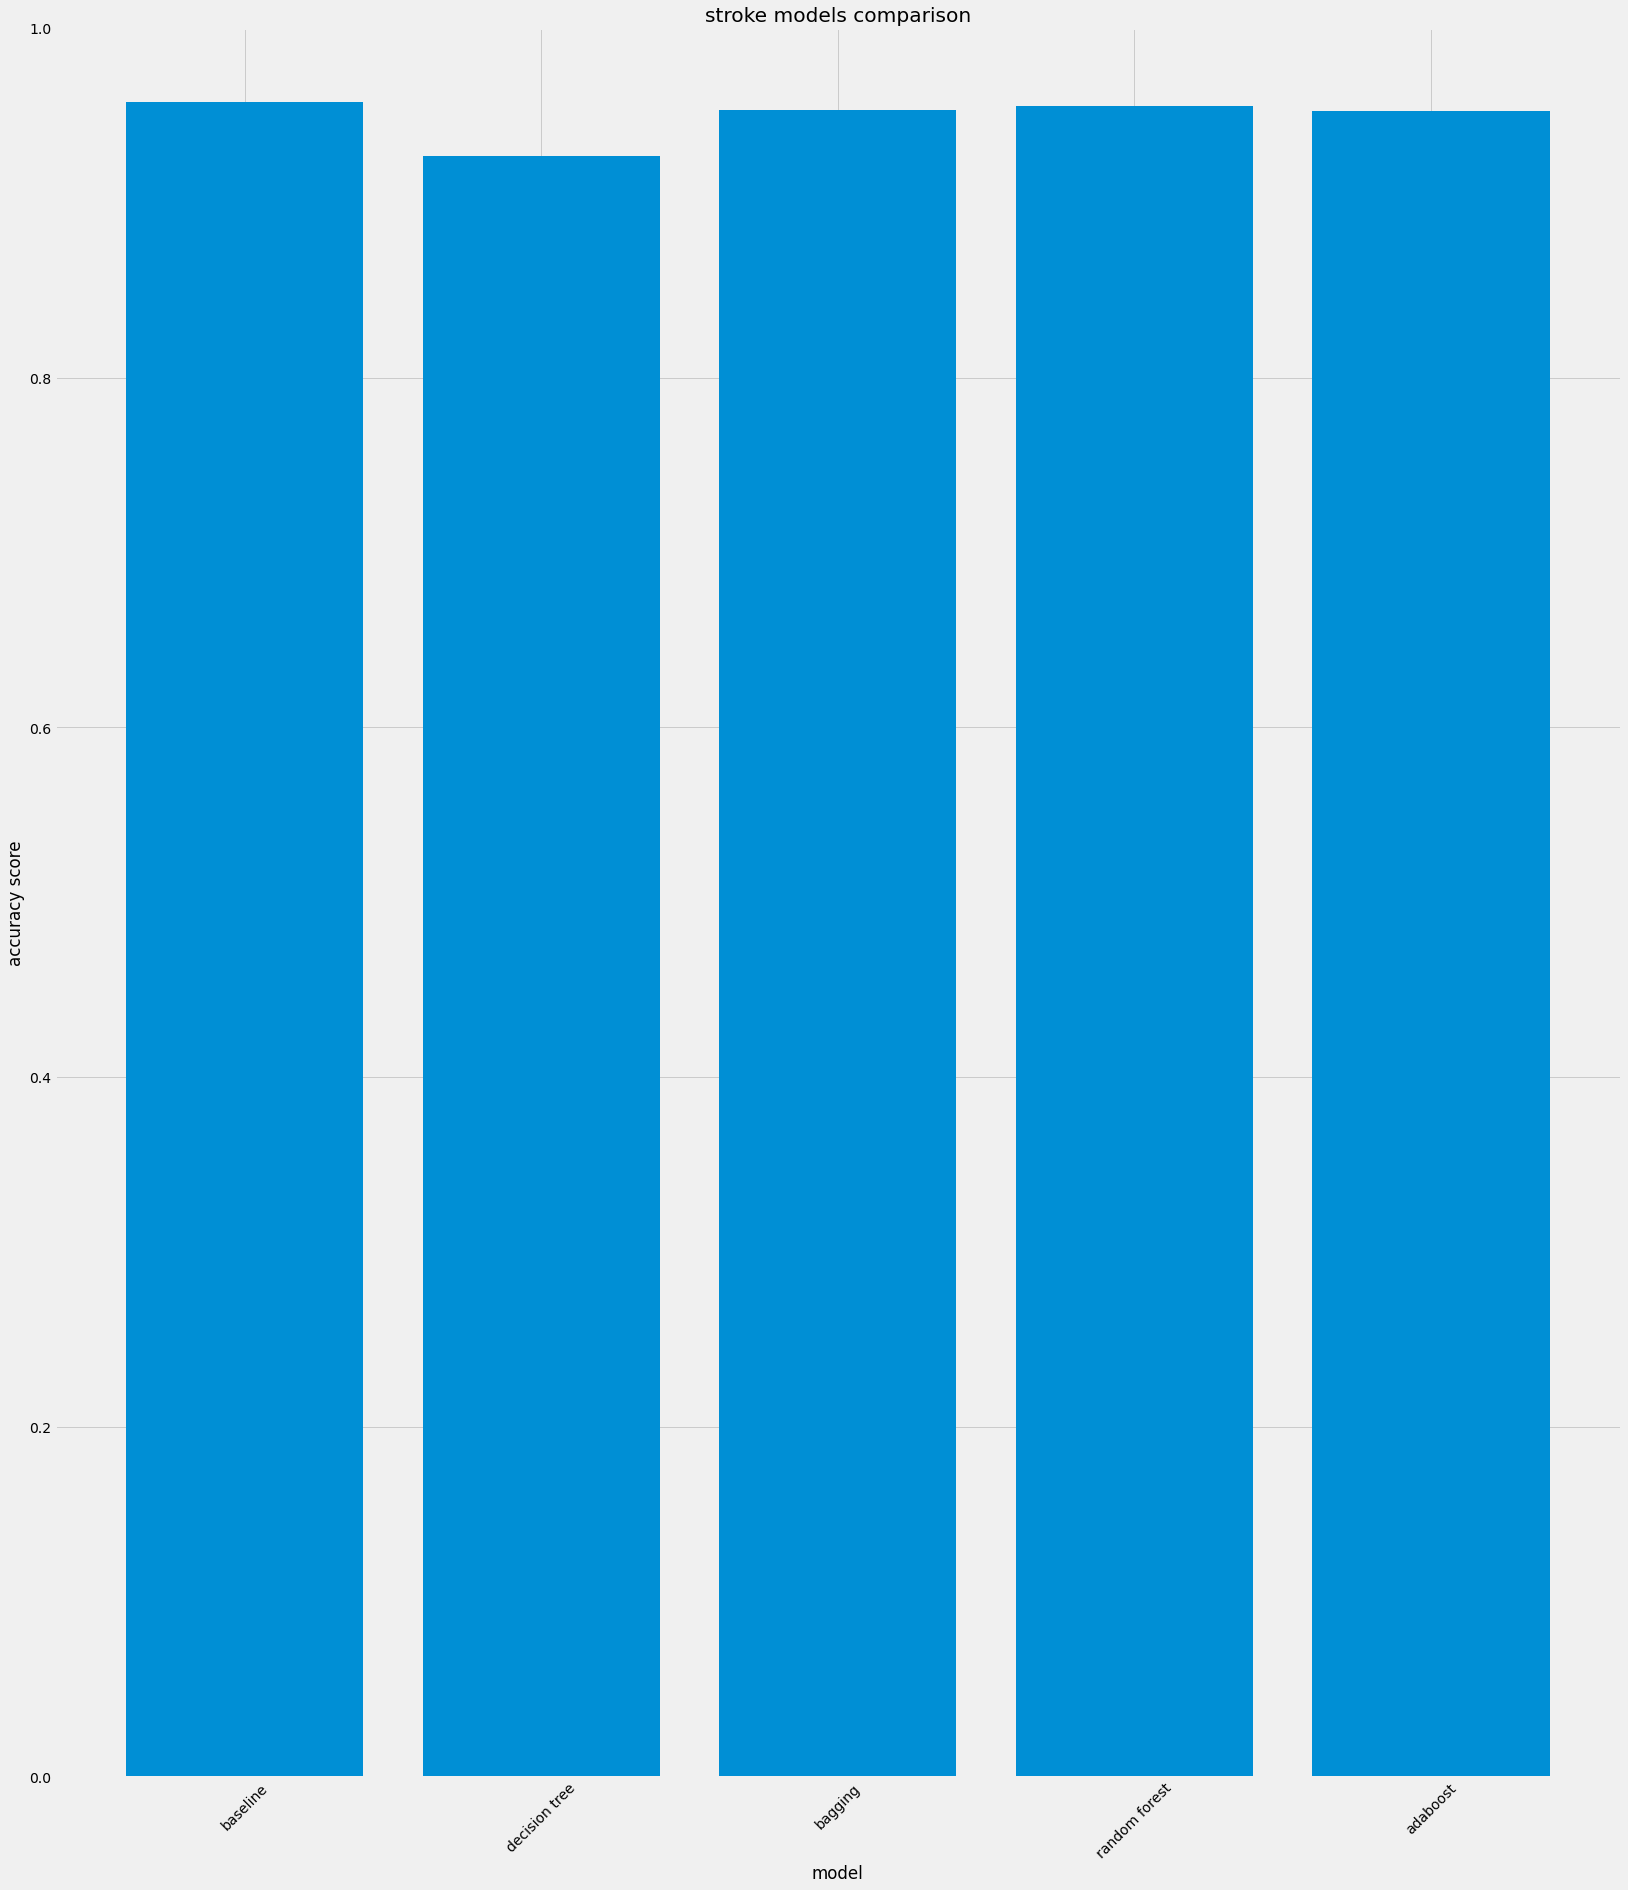

In [43]:
#let's create a final deliverable for people who are not going to see all of this:
accuracyforallmodels = [baseline_acc,acc_dt,acc_bagging,acc_rf,acc_boost]
labels = ['baseline','decision tree','bagging','random forest','adaboost']

plt.style.use('fivethirtyeight')
plt.bar(labels,accuracyforallmodels)
plt.xlabel('model')
plt.ylabel('accuracy score')
plt.ylim(ymax=1.0)
plt.title('stroke models comparison')
plt.xticks(rotation = 45)
plt.savefig('comparisonmodels.png')
plt.show()